Test accuracy: 0.90553
Хорошая работа!
Accuracy: 0.9055283414975507
Precision: 0.9062357617019114
Recall (Sensitivity): 0.9055283414975507
F1-Score: 0.9055294971880381
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       146
           1       0.96      0.97      0.97       145
           2       0.88      0.91      0.89       131
           3       0.92      0.90      0.91       168
           4       0.92      0.94      0.93       145
           5       0.82      0.88      0.85       128
           6       0.99      0.93      0.96       157
           7       0.89      0.93      0.91       137
           8       0.86      0.81      0.84       135
           9       0.86      0.82      0.84       137

    accuracy                           0.91      1429
   macro avg       0.90      0.90      0.90      1429
weighted avg       0.91      0.91      0.91      1429



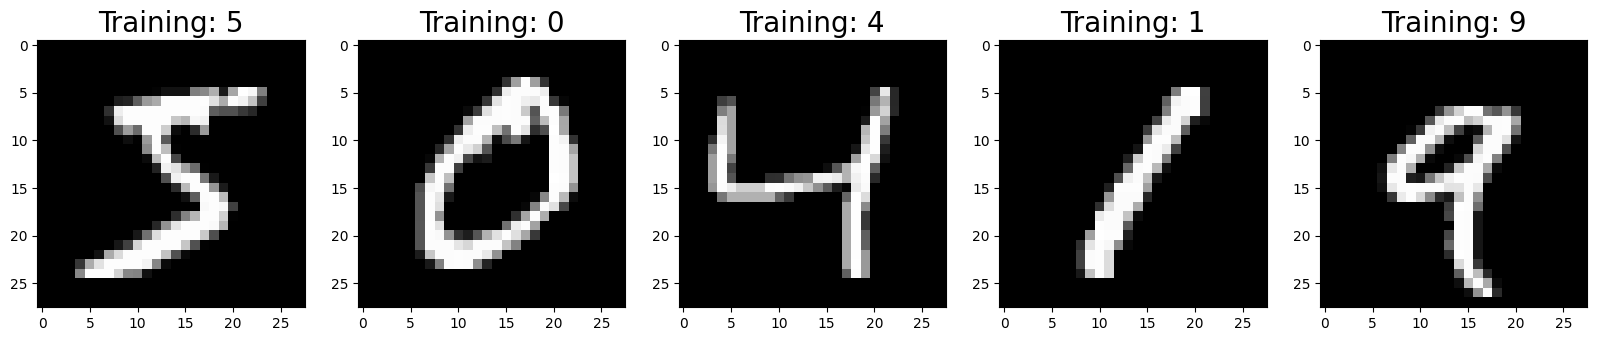

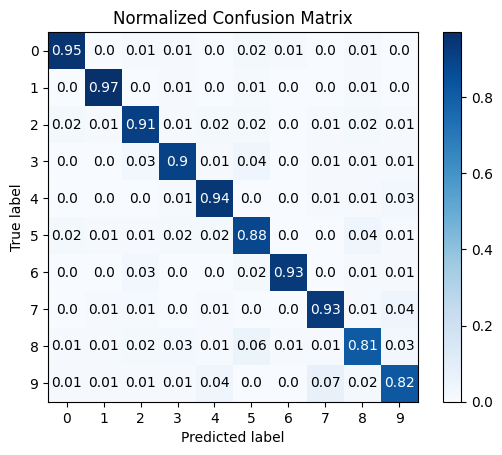

In [3]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

mnist = fetch_openml(data_id=554) # https://www.openml.org/d/554

type(mnist.data), type(mnist.categories), type(mnist.feature_names), type(mnist.target)

data = np.array(mnist.data)
targets = np.array(mnist.target)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(data[0:5],
                                           targets[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + label, fontsize = 20)
    
X_train, X_test, y_train, y_test = train_test_split(data[:10000,:],
                                                   targets[:10000].astype('int'), #targets str to int convert
                                                   test_size=1/7.0,
                                                   random_state=0)

X_train.shape, X_test.shape

### Здесь должен быть ваш код инициализации модели
clf = LogisticRegression(solver='saga', n_jobs=5, tol=0.01, random_state=0, max_iter=1000)

### Здесь должен быть ваш код обучения модели
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = np.mean(y_pred == y_test)

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.9, "попробуйте изменить следующие параметры: penalty, solver"

print('Хорошая работа!')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

print(classification_report(y_test, y_pred))